# NLP on sexism data using Top2Vec method

This notebook analyses a dataset of sexism stories entries that have a 'workplace' tag. 
The timeline of the entries in the dataset ranged from Sep 2019 to Sep 2022.

A similar analysis was done using the LDA method in https://github.com/ifeomaaaa/WiD-Datathon/blob/main/everyday-sexism-topic-modelling-LDA.ipynb

In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [234]:
df = pd.read_csv('../workplace_veryday_sexism_data_1_78.csv')  

## Dataframe clean up

In [235]:
df.head()

,Unnamed: 0,post_id,tags,title,date,description
0,0,post-199274,"['university', 'workplace']",Kayte,21st September 2022,"Hello Laura, Thank you so much for creating a ..."
1,1,post-199279,"['cuerpo', 'workplace']",María,21st September 2022,El director de la Biblioteca donde trabajo men...
2,2,post-199285,"['conferences', 'engineering', 'webinars', 'wo...",A disappointed professional engineer,21st September 2022,"Since lockdowns began over a year ago, I have ..."
3,3,post-199299,['workplace'],Joy,21st September 2022,I work in a library and seeing what passes for...
4,4,post-199308,['workplace'],Lori,21st September 2022,Nothing quite like the review of being “hard t...


In [236]:
# drop title column, remove non-English entry and reset index
df = df.drop('title', axis=1)
df = df.drop(1, axis=0)
df.reset_index(drop=True, inplace=True)
df.head()

,Unnamed: 0,post_id,tags,date,description
0,0,post-199274,"['university', 'workplace']",21st September 2022,"Hello Laura, Thank you so much for creating a ..."
1,2,post-199285,"['conferences', 'engineering', 'webinars', 'wo...",21st September 2022,"Since lockdowns began over a year ago, I have ..."
2,3,post-199299,['workplace'],21st September 2022,I work in a library and seeing what passes for...
3,4,post-199308,['workplace'],21st September 2022,Nothing quite like the review of being “hard t...
4,5,post-199309,['workplace'],21st September 2022,I’m a finance manager – oversee millions of do...


## Top2vec analysis

Top2vec is another NLP method for topic-modelling. It transforms the words in a document into a vector space and the algorithm searches to find clusters/dense areas in the vector space. Each dense area is the topic, and the words associated to the topic can be retrieved. Unlike the LDA method, it doesn't require a pre-requisite setting of the number of clusers as the algorithm will find it. No cleanning up necessary for stop words or stem/lemmatization as well.

However I did run into issues:
- where if there are not enough documents to work with Top2Vec, it would give a ValueError.
- not able to set embedding_model properly due to TF environment issues?, i think it defaults to doc2vec for now. But using doc2vec introduces some randomness in results, see https://github.com/ddangelov/Top2Vec/issues/86

For more information on how it works, see https://github.com/ddangelov/Top2Vec

To install, run `conda install -c conda-forge top2vec`

Note: For importing issues, see:
- https://github.com/ddangelov/Top2Vec/issues/203
- https://pournaki.com/blog/2021-11-08-installing-top2vec-on-apple-m1/index.html

In [237]:
# grab text
textData = df['description'].values.tolist()
len(textData)
# print(textData[0])

769

In [238]:
# !pip install top2vec

In [239]:
from top2vec import Top2Vec

Had to download Universal Sentence Encoder from https://tfhub.dev/google/universal-sentence-encoder

In [240]:
# !pip install tensorflow tensorflow_hub tensorflow_text

In [241]:
# !pip install 'top2vec[sentence_encoders]' 'top2vec[sentence_transformers]' 'top2vec[indexing]'

In [253]:
model = Top2Vec(textData, speed='deep-learn', \
                min_count=10, \
                embedding_model_path='/Users/franciscatan/Documents/Hackathons/WiD_GenderPayGap_2022/universal-sentence-encoder_4/', \
                split_documents=True, \
                document_chunker='sequential', \
                use_embedding_model_tokenizer=True)
                

2022-10-05 11:13:38,593 - top2vec - INFO - Pre-processing documents for training
2022-10-05 11:13:38,914 - top2vec - INFO - Creating joint document/word embedding
2022-10-05 11:14:27,883 - top2vec - INFO - Creating lower dimension embedding of documents
2022-10-05 11:14:30,026 - top2vec - INFO - Finding dense areas of documents
2022-10-05 11:14:30,043 - top2vec - INFO - Finding topics


In [254]:
model.get_num_topics()

3

In [255]:
model.topic_words

array([['leader', 'employees', 'are', 'dear', 'educated', 'respect',
        'subtle', 'responsibility', 'less', 'higher', 'pregnant',
        'human', 'current', 'doubt', 'than', 'colleague', 'level',
        'wish', 'need', 'technical', 'minor', 'consultant', 'leadership',
        'client', 'enjoy', 'think', 'john', 'answer', 'feels', 'choose',
        'is', 'seems', 'tells', 'company', 'organisation', 'complain',
        'main', 'industry', 'makeup', 'career', 'understand', 'more',
        'previous', 'entire', 'weight', 'confidence', 'woman', 'doesn',
        'earlier', 'right'],
       ['bra', 'touch', 'happened', 'groped', 'kissed', 'waitress',
        'drunk', 'reported', 'flirting', 'friends', 'restaurant',
        'shifts', 'grope', 'store', 'attractive', 'believed',
        'coworkers', 'pulled', 'grabbed', 'away', 'he', 'glad', 'pushed',
        'grab', 'sex', 'feelings', 'teenage', 'ass', 'bar', 'thing',
        'volunteer', 'still', 'multiple', 'fingers', 'nothing',
      

### Generate wordcloud of topics

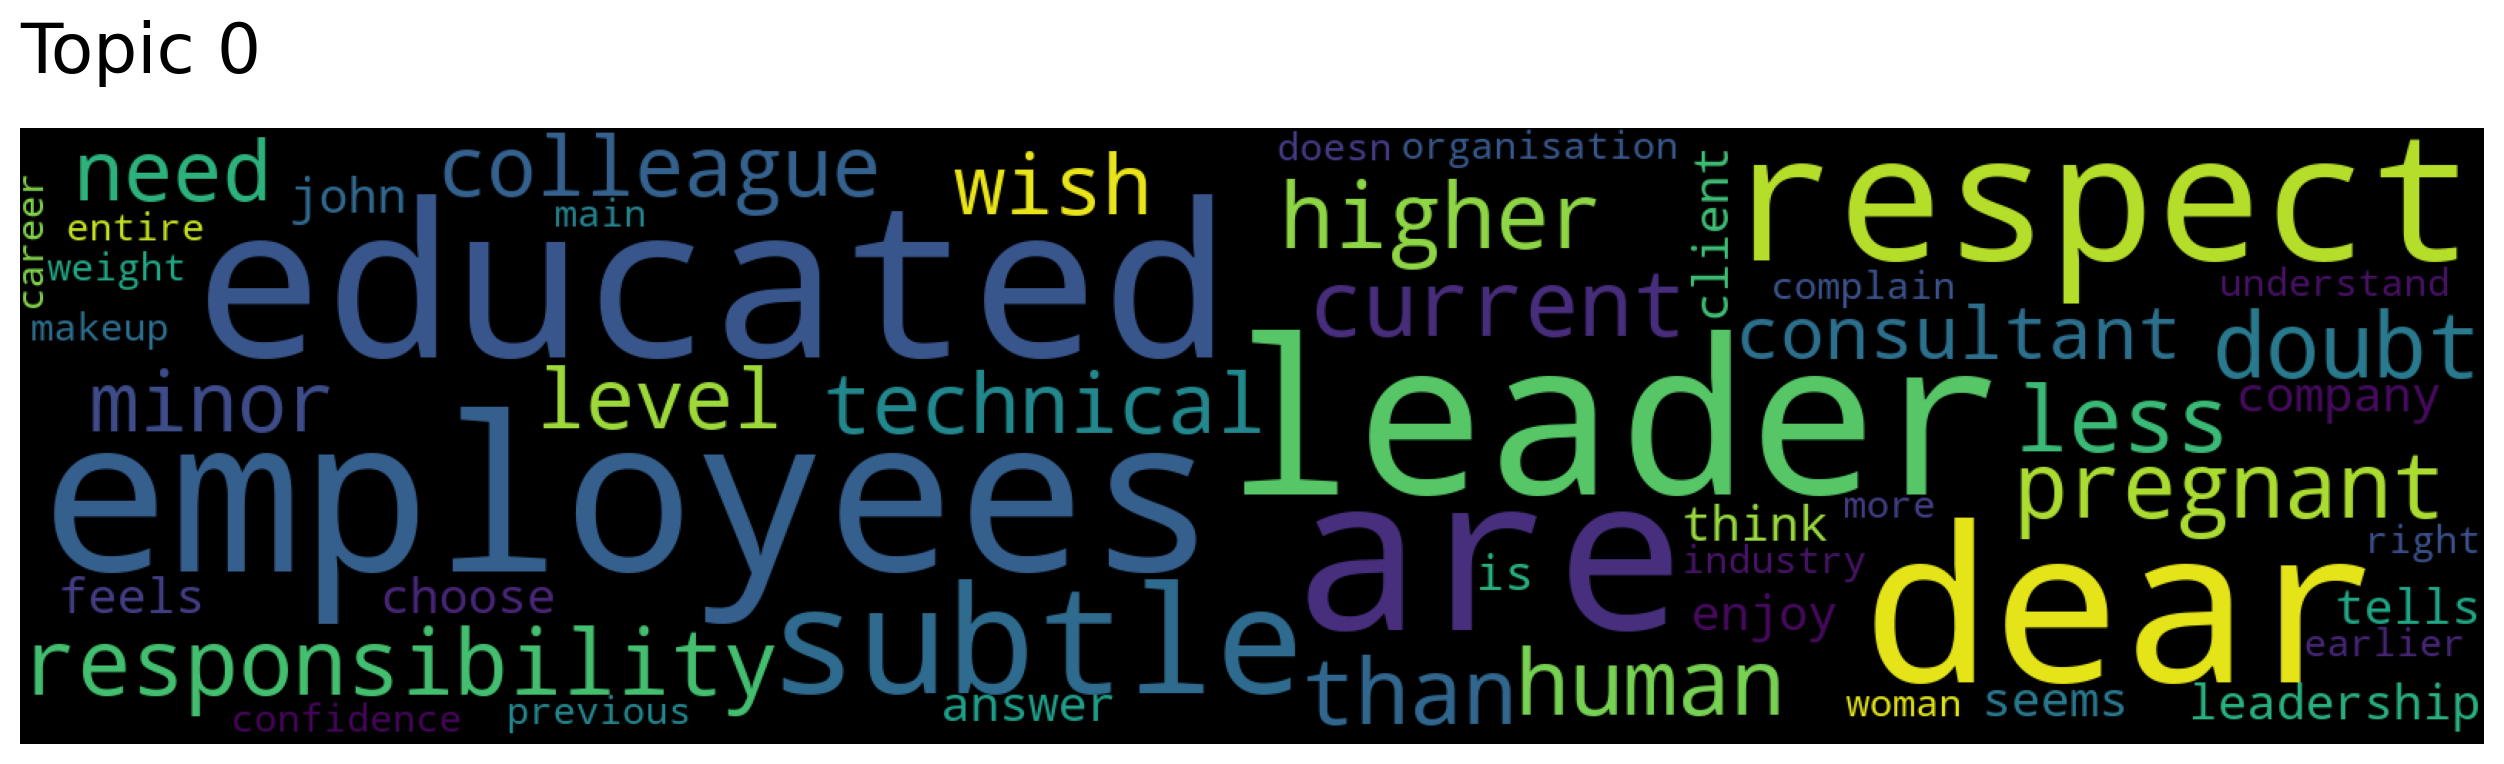

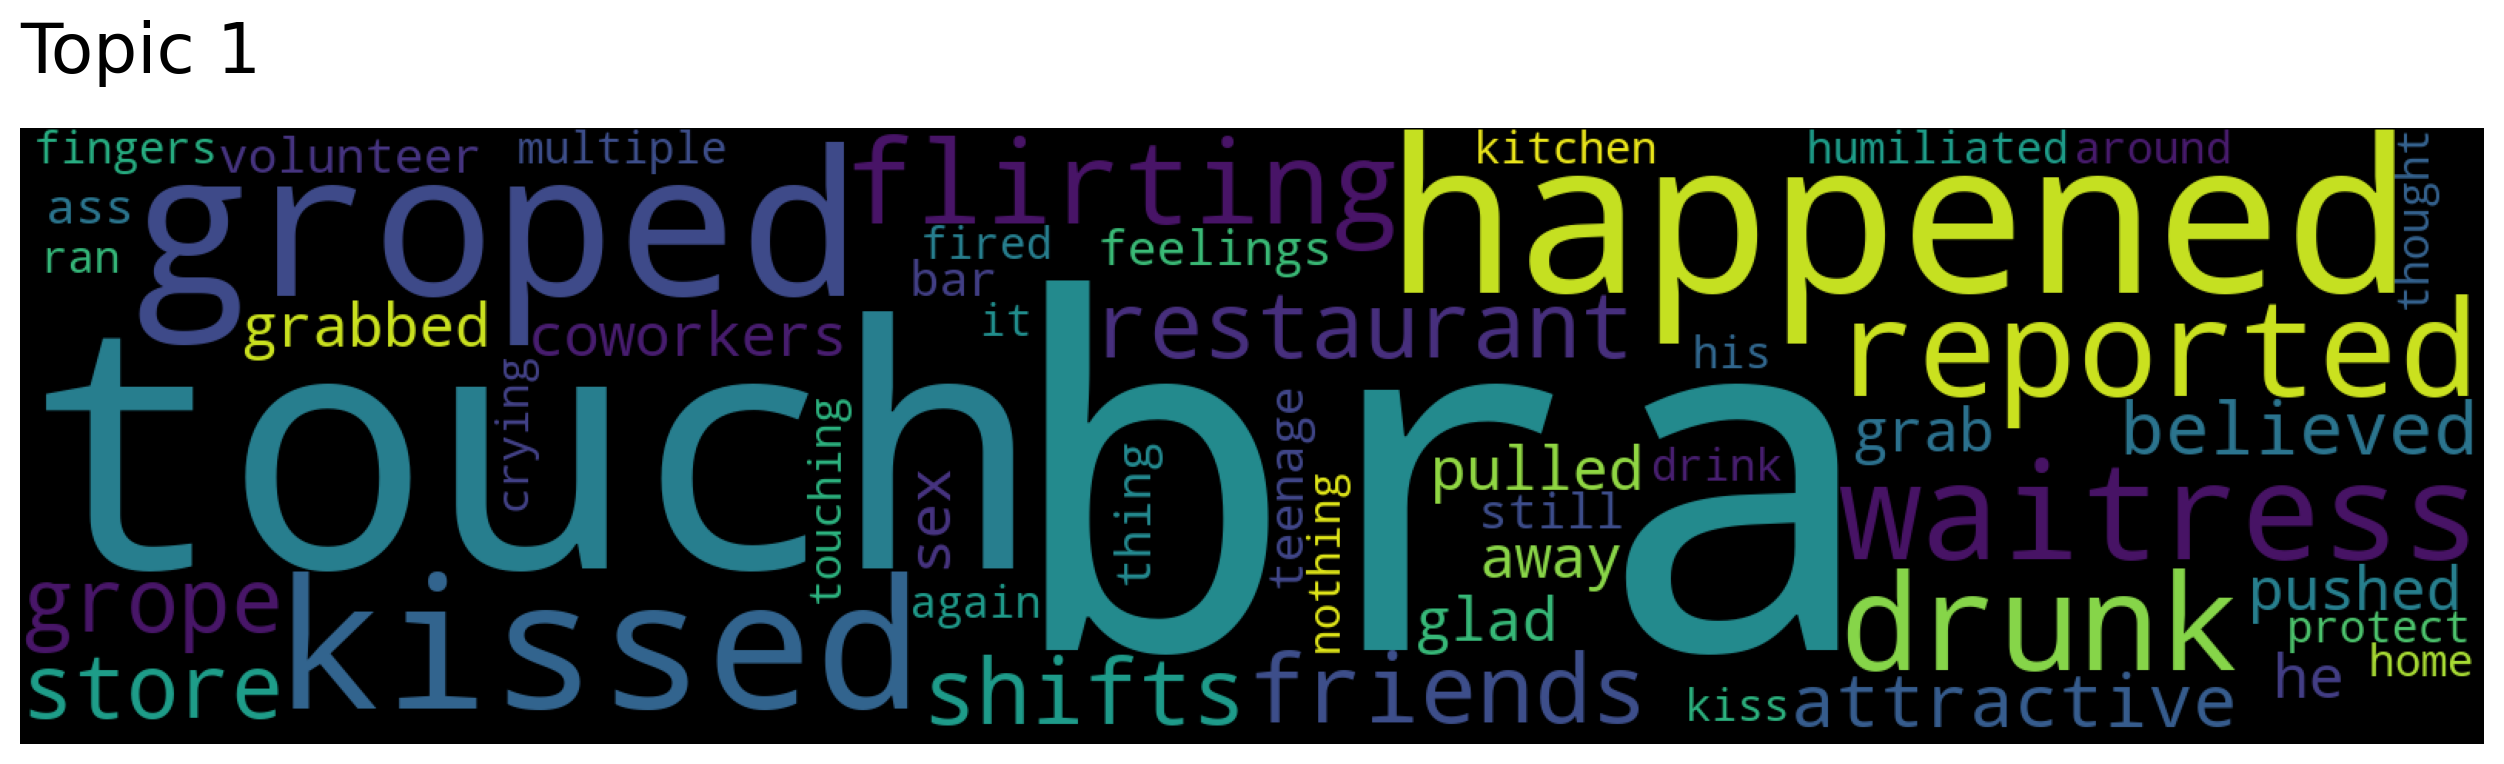

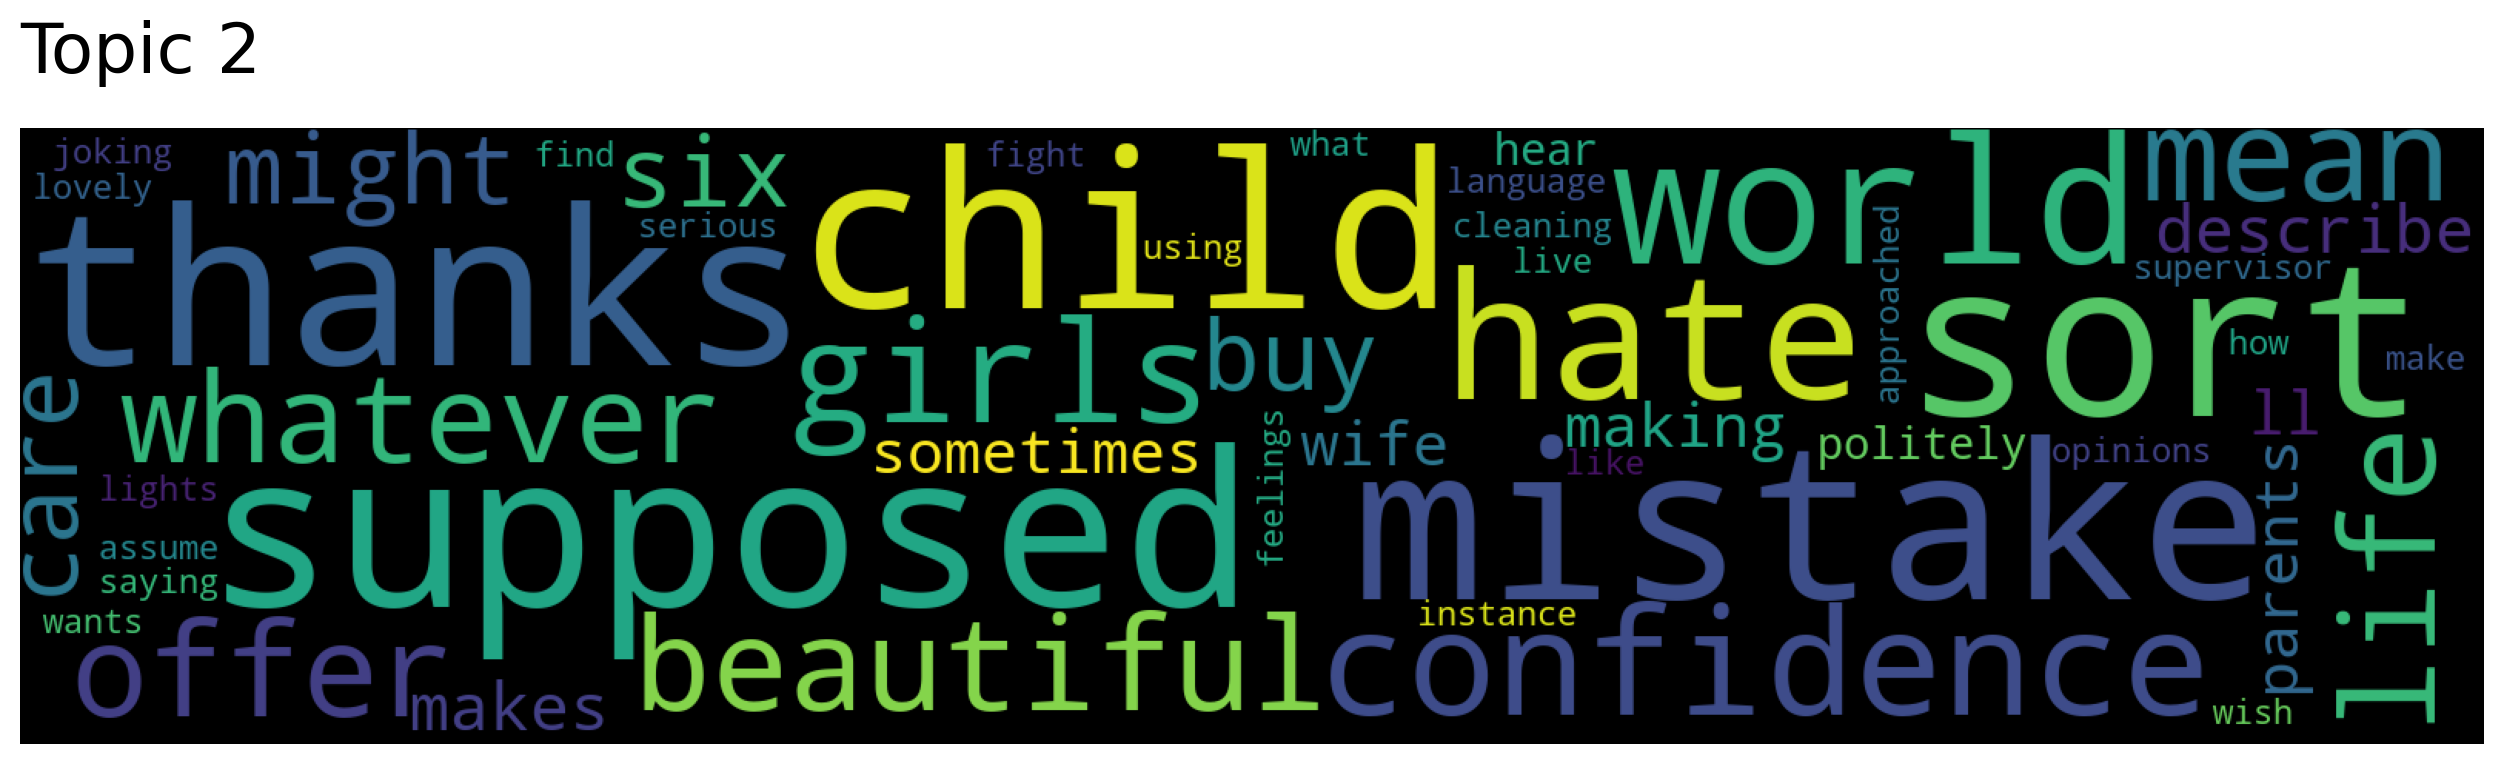

In [260]:
for topic in range(0,model.get_num_topics()):
    model.generate_topic_wordcloud(topic)

Seems like top2vec is only able to pull out 3 topics.
I've tried filtering data that contain the words 'salary', 'pay', but this only produced 41 entries, and top2vec was not able to work on these, it needed more documents. However, we are able to search for the word in the learnt model and explore the similarity with other words.

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [380]:
# define function to generate word cloud of similarity for searched word
def wordCloudSimilarWords(wordList):
    '''
    Purpose         : Generate word cloud of similar words based on word list provided.

    param wordList  : list of str, word list to search
    rType           : None
    '''
    for word in wordList:
        wordScore = model.similar_words(keywords=[word], keywords_neg=[], num_words=20)
        wordcloud = WordCloud(stopwords=STOPWORDS).generate_from_frequencies(tupleWordScores)
        plt.figure()
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title('Words similar to word: ' + word)
        plt.show()  

def similarWordsProbability(word):
    '''
    Purpose         : Prints out similar words associated to provided word and its similarity scores.

    param wordList  : str, word to search similarity for
    rType           : None
    '''
    words, word_scores = model.similar_words(keywords=[word], keywords_neg=[], num_words=20)
    for word, score in zip(words, word_scores):
        print(f"{word} {score}")


The word 'pay' and what the model thinks as similar words and their relationship score:

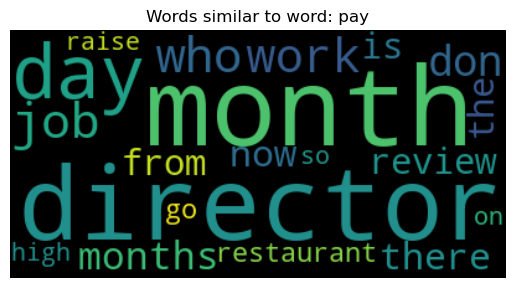

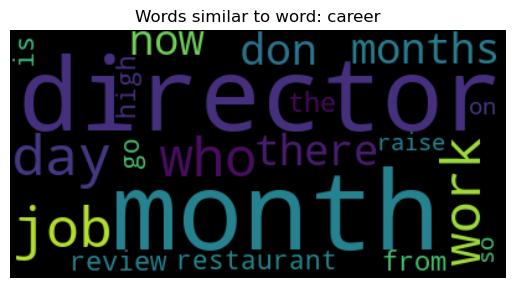

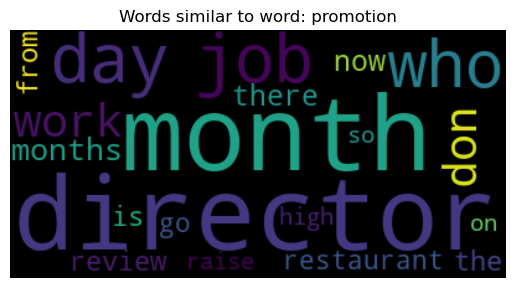

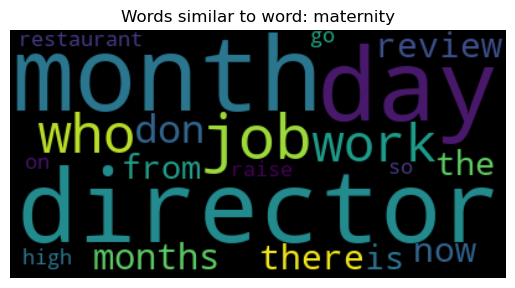

In [384]:
wordCloudSimilarWords(['pay', 'career', 'promotion', 'maternity'])

In [379]:
similarWordsProbability('pay')

month 0.27415304750271663
director 0.2693707661588707
day 0.2672000365954573
job 0.262843498367879
who 0.24751164830072236
work 0.2378775224381227
don 0.23432956714588815
months 0.23097901240270713
there 0.2309676159938433
now 0.23024727784778484
review 0.22428394295324278
from 0.22209860639528067
is 0.22108332102335637
the 0.219139189156563
restaurant 0.215742413268468
go 0.2141933521240837
high 0.21050700280990353
raise 0.20944567889311969
so 0.20680942041377187
on 0.20651739902211214


In [381]:
similarWordsProbability('career')

executive 0.28801161402977116
choice 0.2832544157635266
promotion 0.28177126194091306
university 0.2660899036520455
mother 0.2563007663423251
the 0.25449624141525595
continue 0.23920881454602927
most 0.23393372650973898
be 0.23216285497382655
husband 0.2316743269663653
this 0.2311581064291483
hospital 0.22547606172352994
in 0.22188474561426433
make 0.22052160286202543
who 0.2188587092217295
hurt 0.2155907295284675
my 0.21556944004670997
list 0.2154133063967018
sleeping 0.21478904781958535
response 0.2140168788095787


In [383]:
similarWordsProbability('promotion')

current 0.3388492164703728
without 0.32469803478280895
band 0.29804762365262294
behaviours 0.29217490612255115
career 0.2817712768466296
leave 0.2753868282992833
technical 0.2575878224000775
job 0.25281566460631466
program 0.24917926793241815
maternity 0.24246666219030893
managed 0.23660243206513723
role 0.2347703998925498
research 0.23132680902613117
lose 0.22315449883592992
lights 0.22137655274264673
executive 0.21870935113718426
believe 0.21825016280468257
message 0.21585613518255917
get 0.21464642481060517
married 0.2130404114346952


In [385]:
similarWordsProbability('maternity')

consultant 0.47915051651550067
pregnant 0.4264858533834984
baby 0.3755823548079777
leave 0.36607988987589934
apply 0.32087862129883404
reasons 0.2532086802679485
position 0.25103690608273665
promotion 0.24246664777494742
lap 0.22023837886692343
co 0.21923013336958475
became 0.21831739613830584
on 0.21378820943194948
hr 0.20311358987564898
example 0.199059519840691
planning 0.19818247633279468
shortly 0.19776989650372145
organisation 0.19693057810020134
promoted 0.19636913909018974
helped 0.19631222456468012
not 0.1899823330620529


## Useful references:
- https://towardsdatascience.com/how-to-perform-topic-modeling-with-top2vec-1ae9bb4e89dc 
- https://lppier.github.io/
- https://top2vec.readthedocs.io/_/downloads/en/stable/pdf/